# PREDIKSI HARGA MOBIL BEKAS

prediksi harga mobil bekas dengan menggunakan KNN Regression untuk menentukan harga mobil bekas dari fitur ('year', 'mileage', 'tax', 'mpg', 'engineSize')

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\adityadesai13\used-car-dataset-ford-and-mercedes\versions\3


In [7]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

Pada bagian ini, program mengimpor beberapa library penting yang akan digunakan sepanjang notebook. pandas (pd) digunakan untuk manipulasi data dan pembacaan dataset. numpy (np) dipakai untuk operasi numerik. matplotlib.pyplot (plt) akan digunakan untuk visualisasi data, seperti grafik atau plot. sklearn.metrics (metrics) diimpor untuk menghitung metrik evaluasi dari model pembelajaran mesin.


In [8]:
# MODEL MAPPING

map_model = {
    1: "audi",
    2: "bmw",
    3: "cclass",
    4: "focus",
    5: "ford",
    6: "hyundi",
    7: "merc",
    8: "skoda",
    9: "toyota",
    10: "vauxhall",
    11: "vw"
}

Kode ini membuat sebuah dictionary (map_model) yang memetakan angka 1-11 ke nama-nama merek mobil. Ini bertujuan untuk memberikan pilihan kepada pengguna ketika ingin memilih dataset berdasarkan merek mobil tertentu.


In [9]:
# LOAD DATASET

print("silahkan pilih car brand:")
for key, value in map_model.items():
    print(f"{key}. {value}")

model_choose = ""

car_model = input("masukkan pilihan anda (nomor / nama): ")
if type(car_model) == int:
  if car_model not in [x + 1 for x in range(len(map_model))]:
    print("data mobil tidak tersedia atau opsi salah dipilih!")
  else:
    model_choose = map_model[car_model]
elif type(car_model) == str:
  if car_model not in map_model.values():
    print("data mobil tidak tersedia atau opsi salah dipilih!")
  else:
    model_choose = car_model
else:
  print("data mobil tidak tersedia atau opsi salah dipilih!")

if model_choose == "":
  print("data mobil tidak tersedia atau opsi salah dipilih!")
  print("set default data ke toyota")
  model_choose = "toyota"

row_data = pd.read_csv(f"{path}/{model_choose}.csv")
row_data.shape
print(row_data)

silahkan pilih car brand:
1. audi
2. bmw
3. cclass
4. focus
5. ford
6. hyundi
7. merc
8. skoda
9. toyota
10. vauxhall
11. vw
data mobil tidak tersedia atau opsi salah dipilih!
data mobil tidak tersedia atau opsi salah dipilih!
set default data ke toyota
               model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995  

Di bagian ini, program menampilkan daftar merek mobil yang bisa dipilih. Lalu pengguna diminta memasukkan input berupa angka (nomor) atau string (nama mobil). Setelah validasi input dilakukan, program membaca file CSV yang sesuai dengan pilihan menggunakan pandas.read_csv(). Jika input tidak valid, maka akan otomatis memilih "toyota" sebagai default. Dataset yang berhasil dimuat ditampilkan ke layar.

In [10]:
# PREPROCESSING DATA - DROP NA / NULL DATA
data = row_data.dropna(axis=0)
data.describe()
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


Kode tersebut pertama-tama menghapus semua baris dalam `row_data` yang mengandung nilai kosong (NaN) menggunakan `dropna(axis=0)`, dan hasilnya disimpan ke variabel baru `data`. Kemudian, `data.describe()` digunakan untuk menampilkan ringkasan statistik deskriptif, seperti rata-rata, standar deviasi, nilai minimum, dan maksimum dari kolom numerik. Terakhir, `print(row_data.dtypes)` mencetak tipe data dari setiap kolom pada dataset asli (`row_data`), sehingga pengguna bisa melihat apakah kolom bertipe numerik, objek (string), atau tipe lain.

Drop nilai

In [11]:
# PREPROCESSING DATA - MENETUKAN FITUR

features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((6738, 5), (6738,))

Kode ini melakukan **preprocessing data** dengan cara menentukan fitur mana saja yang akan digunakan untuk memprediksi harga mobil. Pertama, dibuat list `features` yang berisi nama-nama kolom yang dipilih: `'year'`, `'mileage'`, `'tax'`, `'mpg'`, dan `'engineSize'`. Kemudian, variabel `x` diisi dengan data dari kolom-kolom tersebut, sedangkan variabel `y` diisi dengan kolom `'price'` sebagai target prediksi. Terakhir, `x.shape` dan `y.shape` dipanggil untuk menampilkan jumlah baris dan kolom pada data fitur dan label, sehingga bisa diketahui dimensi dataset setelah pemilihan fitur.

In [12]:
# SPLIT DATA, TRAINING 70%, TESTING 30%

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)
print("total data train x:", len(train_x))
print("total data train y:", len(train_y))
print("total data test x:", len(test_x))
print("total data test y:", len(test_y))

total data train x: 5053
total data train y: 5053
total data test x: 1685
total data test y: 1685


Kode ini melakukan **preprocessing data** dengan cara menentukan fitur mana saja yang akan digunakan untuk memprediksi harga mobil. Pertama, dibuat list `features` yang berisi nama-nama kolom yang dipilih: `'year'`, `'mileage'`, `'tax'`, `'mpg'`, dan `'engineSize'`. Kemudian, variabel `x` diisi dengan data dari kolom-kolom tersebut, sedangkan variabel `y` diisi dengan kolom `'price'` sebagai target prediksi. Terakhir, `x.shape` dan `y.shape` dipanggil untuk menampilkan jumlah baris dan kolom pada data fitur dan label, sehingga bisa diketahui dimensi dataset setelah pemilihan fitur.


In [13]:
# MODEL TRAINING - MENGGUNAKAN KKN REGRESSION

from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  34239712.80069909 
 Accuracy:  0.09915033838630982


Kode ini melakukan **pelatihan model regresi** menggunakan algoritma **K-Nearest Neighbors (KNN)** dari scikit-learn, dengan jumlah tetangga (`n_neighbors`) yang ditetapkan sebanyak 80. Model `KNN_Reg` dilatih (`fit`) menggunakan data latih `train_x` dan `train_y`. Setelah pelatihan, akurasi model diukur menggunakan `score` pada data uji (`test_x`, `test_y`), yang menunjukkan seberapa baik model memprediksi harga berdasarkan fitur. Kemudian, prediksi pada data uji dilakukan (`predict`), dan kesalahan model dihitung menggunakan **Mean Squared Error (MSE)**. Akhirnya, nilai MSE dan akurasi model dicetak untuk menilai performa prediksi.

In [14]:
# MODEL TRAINING - USE ELBOW METHOD FOR FIND BEST K VALUE

K = range(80,100)
print("K:", K)
test_mse = []

for i in K:
  model = KNN_Reg(n_neighbors=i)
  model.fit(train_x, train_y)
  tmp = model.predict(test_x)
  tmp = mse(tmp, test_y)
  test_mse.append(tmp)

K: range(80, 100)


Kode ini menerapkan **metode elbow** untuk menentukan nilai **\(k\)** terbaik pada KNN Regression dengan cara menguji rentang nilai dari 80 hingga 99. Untuk setiap nilai \(i\) dalam `K`, dibuat model `KNN_Reg(n_neighbors=i)`, lalu dilatih menggunakan data latih (`train_x`, `train_y`). Setelah model terlatih, dilakukan prediksi pada data uji (`test_x`) dan dihitung **Mean Squared Error (MSE)** antara prediksi dan nilai aktual (`test_y`). Setiap nilai MSE disimpan ke dalam list `test_mse`, sehingga di akhir loop Anda memiliki daftar MSE untuk masing-masing \(k\) dan dapat memilih \(k\) dengan MSE terendah sebagai nilai optimal.

Text(0.5, 1.0, 'Elbow Curve for Test')

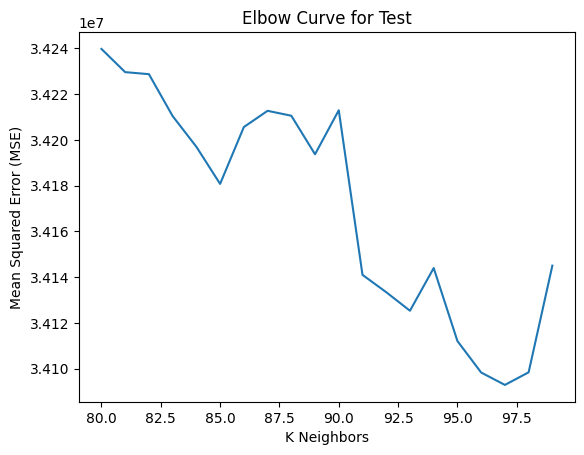

In [15]:
# MODEL TRAINING - PLOTTING KKN
plt.plot(K,test_mse)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

Kode ini membuat **elbow curve** dengan memplot daftar `test_mse` (Mean Squared Error) terhadap rentang nilai `K` (jumlah tetangga). Fungsi `plt.plot(K, test_mse)` menggambar grafik garis, lalu `plt.xlabel`, `plt.ylabel`, dan `plt.title` memberi label pada sumbu-x (“K Neighbors”), sumbu-y (“Mean Squared Error (MSE)”), dan judul (“Elbow Curve for Test”). Dengan melihat titik “siku” pada kurva, Anda bisa memilih nilai \(K\) optimal di mana penurunan MSE mulai melambat.

In [16]:
# MODEL EVALUATION

new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n',
      'Accuracy of old model (%):', acc1*100, '\n Improvement (%):',
       (acc2-acc1)*100
)



 Accuracy of new model (%): 10.30126886019379 
 Accuracy of old model (%): 9.915033838630983 
 Improvement (%): 0.38623502156280853


Kode ini membuat **model KNN baru** dengan **\(k = 97\)** (nilai optimal dari elbow method), lalu melatihnya kembali menggunakan data latih (`new_model.fit(train_x, train_y)`). Dengan `new_model.score(test_x, test_y)` dihitung **nilai \(R^2\)** pada data uji, yang kemudian dikalikan 100 untuk mendapatkan persentase “akurasi”. Akhirnya, `print` mencetak persentase akurasi model baru, perbandingan dengan akurasi model lama (`acc1`), dan selisihnya sebagai **persentase peningkatan** performa.

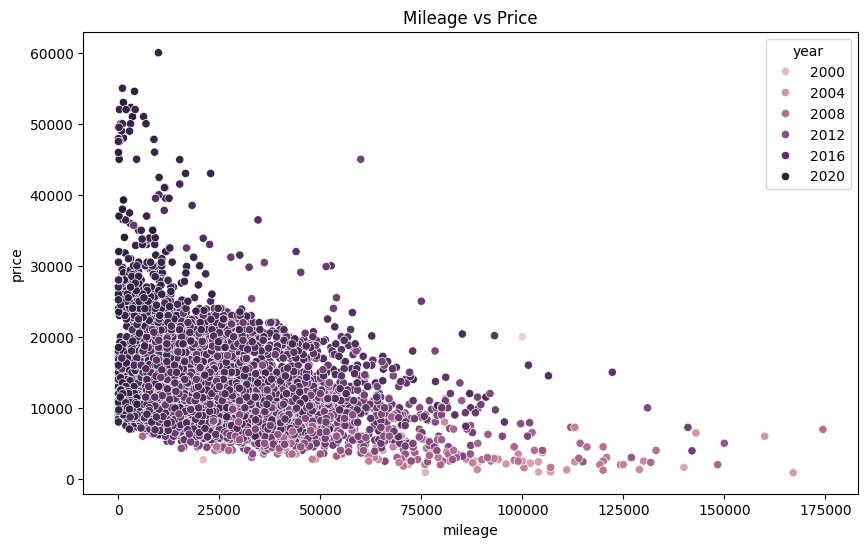

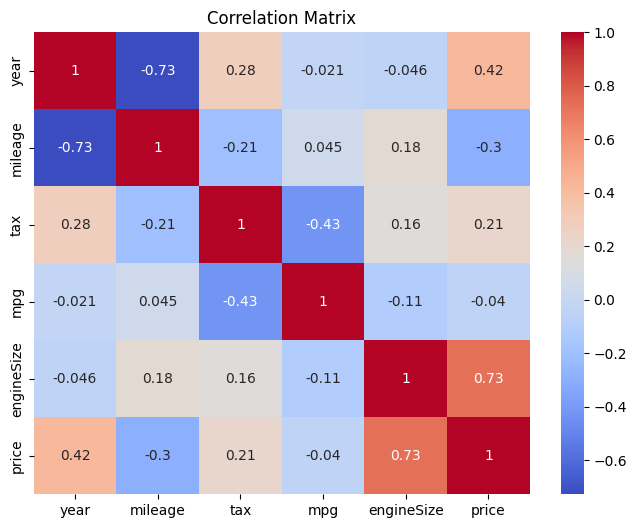

Decision boundary visualization is not supported for more than two features.


In [17]:
# VISUALISASI

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=data, hue='year')
plt.title('Mileage vs Price')
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[features + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


if len(features) == 2:
  x_min, x_max = x[features[0]].min() - 1, x[features[0]].max() + 1
  y_min, y_max = x[features[1]].min() - 1, x[features[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

  Z = new_model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(x[features[0]], x[features[1]], c=y, alpha=0.8)  # Use 'y' (target variable) for color
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.title('Decision Boundary')
  plt.show()
else:
  print("Decision boundary visualization is not supported for more than two features.")


Kode ini mengimpor `matplotlib.pyplot`, `numpy`, dan `seaborn` untuk membuat dua jenis visualisasi utama: pertama, **scatter plot** yang menampilkan sebaran `mileage` versus `price` dengan pewarnaan berdasarkan `year`, sehingga kita dapat melihat bagaimana jarak tempuh dan tahun kendaraan memengaruhi harga; kedua, **heatmap** dari matriks korelasi antara fitur (`year`, `mileage`, `tax`, `mpg`, `engineSize`) dan `price`, lengkap dengan anotasi nilai korelasi, sehingga memudahkan identifikasi fitur paling berpengaruh. Selanjutnya, jika hanya dua fitur dipilih, kode membuat **decision boundary** untuk model KNN: ia membuat grid koordinat, memprediksi harga pada setiap titik grid, lalu menampilkan kontur prediksi di bawah sebaran data asli (diberi warna menurut nilai target), sehingga batas keputusan model dapat divisualisasikan. Jika fitur lebih dari dua, ia hanya mencetak pesan bahwa visualisasi boundary tidak didukung.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


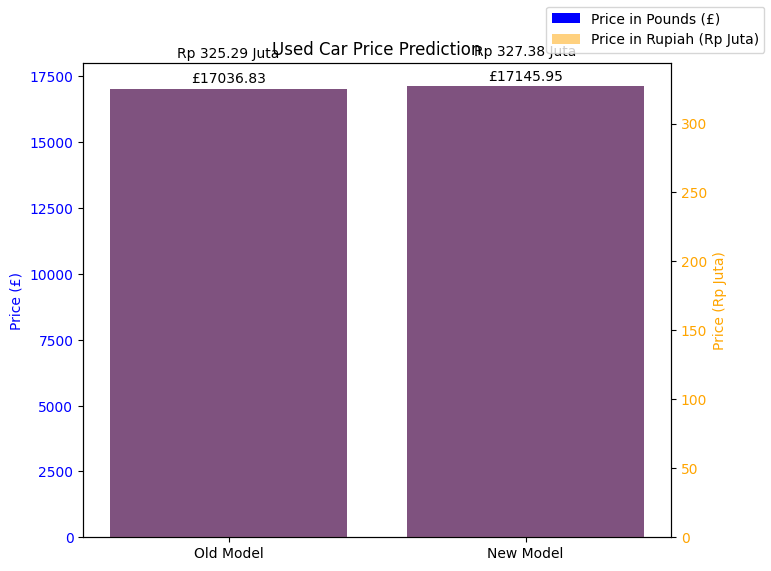

In [20]:
# TESTING MANUAL

idr = 19093.55

tahun = int(input("masukkan tahun mobil: "))
mileage = int(input("masukkan mileage mobil (miles): "))
tax = int(input("masukkan tax mobil (£): "))
mpg = float(input("masukkan mpg mobil: "))
engineSize = int(input("masukkan engineSize mobil: "))

data_mobil_bekas = np.array([[tahun, mileage, tax, mpg, engineSize]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)

# Displaying the Results with a Bar Chart
labels = ['Old Model', 'New Model']
prices_pounds = [prediction_old[0], prediction_new[0]]  # Extract values from arrays
prices_rupiah = [prediction_old[0] * idr * 1e-6, prediction_new[0] * idr * 1e-6]

fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar chart for Prices in Pounds
bars1 = ax1.bar(labels, prices_pounds, color='blue', label='Price in Pounds (£)')
ax1.set_ylabel('Price (£)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Prices in Rupiah
ax2 = ax1.twinx()
bars2 = ax2.bar(labels, prices_rupiah, color='orange', alpha=0.5, label='Price in Rupiah (Rp Juta)')  # alpha for transparency
ax2.set_ylabel('Price (Rp Juta)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add prediction values as text on the bars
for bar1, bar2, price_pound, price_rupiah in zip(bars1, bars2, prices_pounds, prices_rupiah):
    ax1.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 100, f'£{price_pound:.2f}', ha='center', va='bottom', color='black')
    ax2.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 20, f'Rp {price_rupiah:.2f} Juta', ha='center', va='bottom', color='black')

# Adjust layout to prevent overlap (add padding)
plt.tight_layout(pad=3.0)  # Add padding around the figure


plt.title('Used Car Price Prediction')
plt.xlabel('Model')
fig.legend(loc="upper right")  # Place legend
plt.show()

Kode ini pertama-tama menetapkan nilai tukar (`idr`) untuk konversi dari Pound (£) ke Rupiah, lalu meminta input pengguna untuk tahun, mileage, tax, mpg, dan engineSize mobil bekas. Data input disusun menjadi array NumPy berukuran 1×5, kemudian digunakan untuk memanggil prediksi harga dari dua model—`model` (lama) dan `new_model` (baru). Hasil prediksi dalam Pound disimpan di `prices_pounds`, lalu dikonversi ke Rupiah (dalam jutaan) di `prices_rupiah`. Selanjutnya dibuat diagram batang ganda: batang biru pada sumbu kiri menampilkan harga dalam Pound, dan batang oranye transparan pada sumbu kanan menampilkan harga dalam Rupiah. Nilai prediksi ditambahkan sebagai teks di atas masing-masing batang, layout disesuaikan agar tidak tumpang tindih, serta judul, label sumbu, dan legenda ditambahkan untuk memperjelas visualisasi perbandingan harga.